<center><h3>Abstract</h3></center><br>
This report will discuss about how to generate spectra out of sampled data using DFT Discrete fourier transform for two kinds of signals which are periodic and aperiodic in time domain. We use fast fourier transform algorithm to compute DFT which is done by fft and fftshift.We also analyse how to find approximate DFT for aperiodic signal or Infinitely long existing signal $Gaussian$.We also analyse how to recover the analog Fourier Tranform for some known functions like Gaussian by the proper sampling of the function and finding proper normalisation constant.

# Introduction
* We analyse and use the infamous DFT to find the Fourier transform of periodic signals and non periodic ones using fast fourier transform algorithms which are implemented in python using $fft$ and $fftshift$ which is used to center the fourier spectra of a discrete signal.
* The discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency.
*  Let suppose f[n] are the samples of some continous function $f(t)$ then we define the Z transform as

\begin{equation}
F(z) = \sum_{n = -\infty}^{n = \infty} f(n)z^{-n}
\end{equation}

* Replacing z with $e^{j\omega}$ we get DTFT of the sampled function

\begin{equation}
F(e^{j\omega}) = \sum_{n = -\infty}^{\infty} f(n)e^{-j\omega n}
\end{equation}

* $F(e^{j\omega})$ is continuous and periodic. $f[n]$ is discrete and aperiodic. Suppose now $f[n]$ is itself periodic with a period $N$, i.e., $$ f[n+N] = f[n] $$

* Then, it should have samples for its DTFT. This is true, and leads to the Discrete Fourier Transform or the DFT:
* Suppose $f[n]$ is a periodic sequence of samples, with a period N. Then the DTFT of the sequence is also a periodic sequence $F[k]$ with the same period N.

\begin{equation}
F[k] = \sum_{n = 0}^{N-1} f[n]e^{-j\frac {2\pi nk}{N}} = \sum_{n = 0}^{N-1} f[n]W^{nk}
\end{equation}


\begin{equation}
f[n] = \frac{1}{N} \sum_{k = 0}^{N-1} F[k]W^{-nk}
\end{equation}

* Here $W = e^{-j\frac {2\pi nk}{N}} $ is used simply to make the equations less cluttered. and k is sampled values of continous variable $\omega$ at multiples of $\frac{2\pi}{N}$

*  What this means is that the DFT is a sampled version of the DTFT, which is the digital version of the analog Fourier Transform .In this assignment, we want to explore how to obtain the DFT, and how to recover the analog Fourier Tranform for some known functions by the proper sampling of the function

In [3]:
import writefile_run as writefile_run

In [17]:
%%writefile_run ee16b031_assignment9.py
# load libraries and set plot parameters
%matplotlib inline
from pylab import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 12,9
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.numpoints'] = 2
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"


In [5]:
tile

<function numpy.lib.shape_base.tile>

# Question 1:

* To find Discrete Fourier Transform $DFT$ of $\sin\left(5t\right)$ and $(AM)$ Amplitude Modulated signal given by $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$
* Plot and analyse the spectrum obtained for both the functions given above. 
* Cross validate the spectrum obtained with what is expected.
* To compare the spectrum obtained for $\sin(5t)$, we use 


\begin{equation}
\sin(5t) = \frac{1}{2j}e^{j5} - \frac{1}{2j}e^{-j5}
\end{equation}

* So the fourier transform of $\sin(5t)$ using above relation is  

\begin{equation}
\mathscr{F}({\sin(5t)})  \to \frac{1}{2j}(\ \delta(\omega -5) - \delta(\omega+5) \ ) 
\end{equation}

* Similarly for finding Fourier Transform $AM$ signal following relations are used 

\begin{equation}
\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right) \to \cos(10t)+0.1\cos(10t)\cos(t)
\end{equation}

\begin{equation}
0.1\cos(10t)\cos(t) \to 0.05(\ \cos(11t) +cos(9t) \ )
\end{equation}

\begin{equation}
\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right) \to 0.025(e^{j11t} + e^{j9t} + e^{−j11t} + e^{-j9t})
\end{equation}

* So we can find fourier transform from above relation
* So using this we compare the plots of Magnitude and phase spectrum obtained using $DFT$ and analyse them.

In [6]:
%%writefile_run ee16b031_assignment9.py -a

'''
Function to select different functions
Arguments:
 t -> vector of time values
 n -> encoded from 1 to 6 to select function
'''

def f(t,n):
    if(n == 1):
        return sin(5*t)
    elif(n==2):
        return (1+0.1*cos(t))*cos(10*t)
    elif(n==3):
        return pow(sin(t),3)
    elif(n==4):
        return pow(cos(t),3)
    elif(n==5):
        return cos(20*t +5*cos(t))
    elif(n==6):
        return exp(-pow(t,2)/2)
    else:
        return sin(5*t)

In [7]:
%%writefile_run ee16b031_assignment9.py -a

'''
Function to find Discrete Fourier Transform
Arguments:
 low_lim,up_lim -> lower & upper limit for time vector
 no_points      -> Sampling rate
 f              -> function to compute DFT for
 n              -> mapped value for a function ranges(1,6)
 norm_factor    -> default none, only for Gaussian function
                   it is given as parameter
'''

def findFFT(low_lim,up_lim,no_points,f,n,norm_Factor=None):
    t = linspace(low_lim,up_lim,no_points+1)[:-1]
    y = f(t,n)
    N = no_points
    
    # DFT for gaussian function 
    # ifftshift is used to center the function to zero
    # norm_factor is multiplying constant to DFT

    if(norm_Factor!=None):
        Y = fftshift((fft(ifftshift(y)))*norm_Factor)
    else:
        #normal DFT for periodic functions
        Y = fftshift(fft(y))/(N)
        
    w_lim = (2*pi*N/((up_lim-low_lim)))
    w = linspace(-(w_lim/2),(w_lim/2),(no_points+1))[:-1] 
    return t,Y,w

In [8]:
%%writefile_run ee16b031_assignment9.py -a


'''
Function to plot Magnitude and Phase spectrum for given function
Arguments:
 t              -> time vector
 Y              -> DFT computed
 w              -> frequency vector
 threshold      -> value above which phase is made zero
 Xlims,Ylims    -> limits for x&y axis for spectrum
 plot_title,fig_no -> title of plot and figure no
'''

def plot_FFT(t,Y,w,threshold,Xlims,plot_title,fig_no,Ylims=None):
    
    figure()
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim(Xlims)
        
    ylabel(r"$|Y(\omega)| \to$")
    title(plot_title)
    grid(True)
    
    ax = subplot(2,1,2)
    ii=where(abs(Y)>threshold)
    plot(w[ii],angle(Y[ii]),'go',lw=2)

    if(Ylims!=None):
        ylim(Ylims)
    
    xlim(Xlims)
    ylabel(r"$\angle Y(j\omega) \to$")
    xlabel(r"$\omega \to$")
    grid(True)
    savefig("fig9-"+fig_no+".png")
    show()

## Imperfect Calculation of DFT

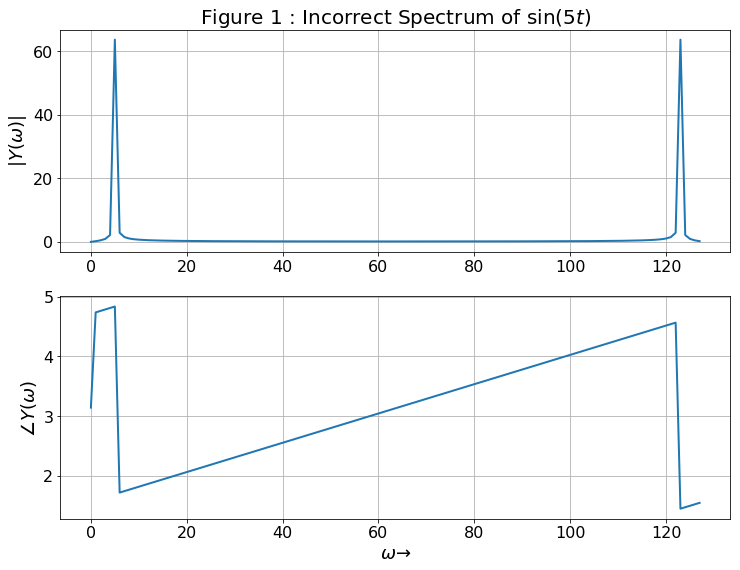

In [9]:
%%writefile_run ee16b031_assignment9.py -a

'''
DFT for sin(5t) computed in incorrect way
* like without normalizing  factor
* without centering fft of function to zero
'''

x=linspace(0,2*pi,128)
y=sin(5*x)
Y=fft(y)
figure()
subplot(2,1,1)
plot(abs(Y),lw=2)
title(r"Figure 1 : Incorrect Spectrum of $\sin(5t)$")
ylabel("$|Y(\omega)|$")
grid(True)
subplot(2,1,2)
plot(unwrap(angle(Y)),lw=2)
xlabel(r"$\omega \to $")
ylabel(r"$\angle Y(\omega)$")
grid(True)
savefig("fig9-1.png")
show()

## Corrected Method to compute DFT for Periodic signals
* Now to correct the spectra we use $fftshift$ to shift the spectra centered to zero, because only usage of $fft$ will give us spectra from 0 onwards. But we need spectra for $\omega < 0$ also. 

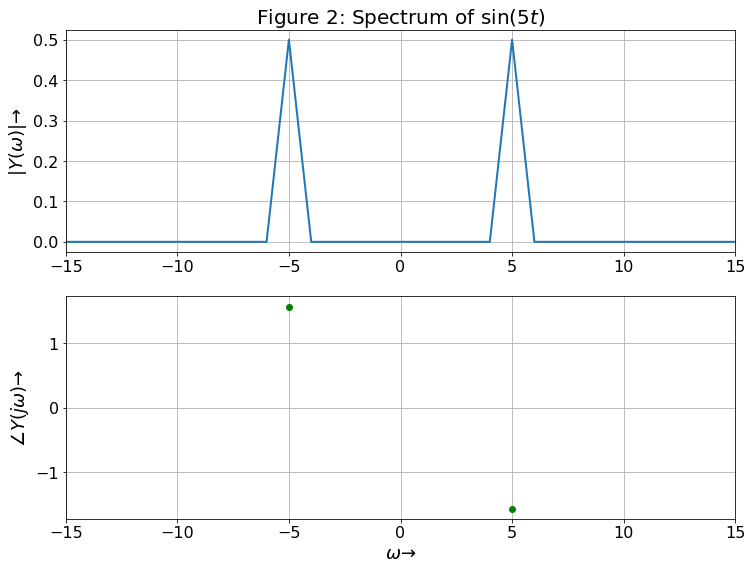

In [10]:
%%writefile_run ee16b031_assignment9.py -a

t,Y,w = findFFT(0,2*pi,128,f,1)
Xlims = [-15,15]
plot_FFT(t,Y,w,1e-3,Xlims,r"Figure 2: Spectrum of $\sin(5t)$","2")

### Results and Discussion :
* As we observe the plot frequency contents are of $\omega = 5,-5 rads^-1$
* Since everything consists of $\sin $ terms so phase is zero and $\pi$ alternatively.For amplitude of the spectra we analyse the fourier transform of $sin 5t$ which is derived above.

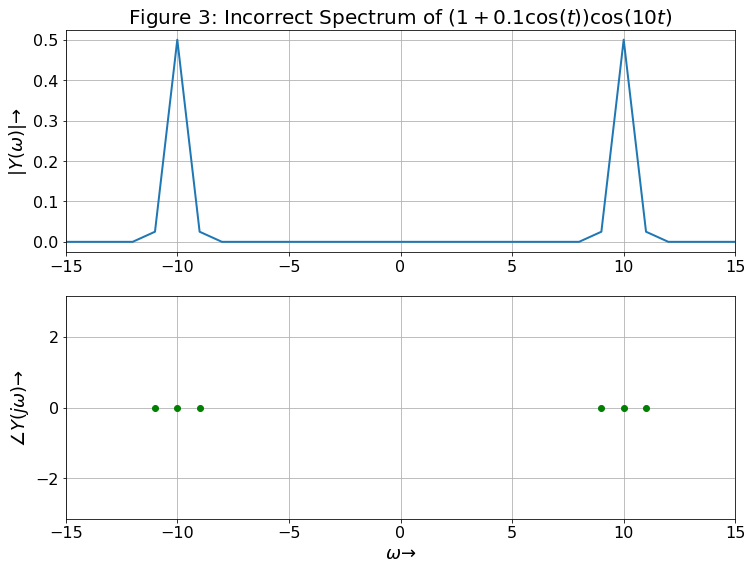

In [11]:
%%writefile_run ee16b031_assignment9.py -a

t,Y,w = findFFT(0,2*pi,128,f,2)
Xlims = [-15,15]
Ylims = [-pi,pi]
plot_FFT(t,Y,w,1e-4,Xlims,
         r"Figure 3: Incorrect Spectrum of $(1+0.1\cos(t))\cos(10t)$","3"
         ,Ylims)

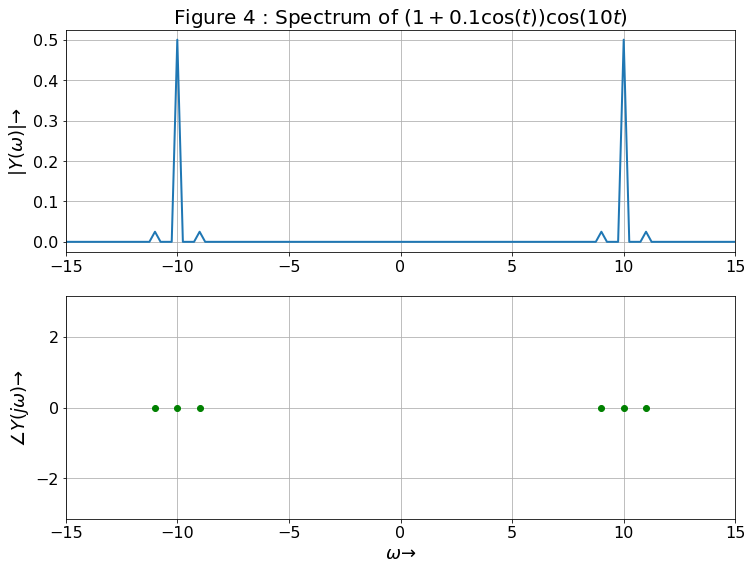

In [12]:
%%writefile_run ee16b031_assignment9.py -a

t,Y,w = findFFT(-4*pi,4*pi,512,f,2)
Xlims = [-15,15]
Ylims = [-pi,pi]
tit = r"Figure 4 : Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$"
plot_FFT(t,Y,w,1e-4,Xlims,tit,
"4",Ylims)

### Results and Discussion :
* As we observe the plot it has center frequencies of $\omega = 10,-10$ from carrier signal and as expected we get side band frequencies at $\omega = \pm 9 , \pm 11 $ .Since amplitude of the message signal is changed by a carrier signal $\cos(10t)$ . It is called as amplitude modulation. And the amplitude of the side band frequencies are obtained from fourier transform expression.
* Phase spectra is 0 since only $\cos $ terms.

# Question 2:

* To find Discrete Fourier Transform $DFT$ of $\sin ^{3}(t)$ and $\cos^{3}(t)$
* Plot and analyse the spectrum obtained for both the functions given above. 
* Cross validate the spectrum obtained with what is expected.
* To compare the spectrum obtained for $\sin^{3}(t)$, we use 


\begin{equation}
\sin^{3}(t) = \frac{3}{4}\sin(t) - \frac{1}{4}\sin(3t)
\end{equation}

* So the fourier transform of $\sin^{3}(t)$ using above relation is  

\begin{equation}
\mathscr{F}({\sin^{3}(t)})  \to \frac{3}{8j}(\ \delta(\omega -1) - \delta(\omega+1) \ ) - \frac{1}{8j}(\ \delta(\omega -3) - \delta(\omega+3) \ )
\end{equation}

* Similarly $\cos^{3}(t)$ is given by 

\begin{equation}
\cos^{3}(t) = \frac{3}{4}\cos(t) + \frac{1}{4}\cos(3t)
\end{equation}

* So the fourier transform of $\sin^{3}(t)$ using above relation is  

\begin{equation}
\mathscr{F}({\cos^{3}(t)})  \to \frac{3}{8j}(\ \delta(\omega -1) + \delta(\omega+1) \ ) + \frac{1}{8j}(\ \delta(\omega -3) + \delta(\omega+3) \ )
\end{equation}

* So using this we compare the plots of Magnitude and phase spectrum obtained using $DFT$ and analyse them.

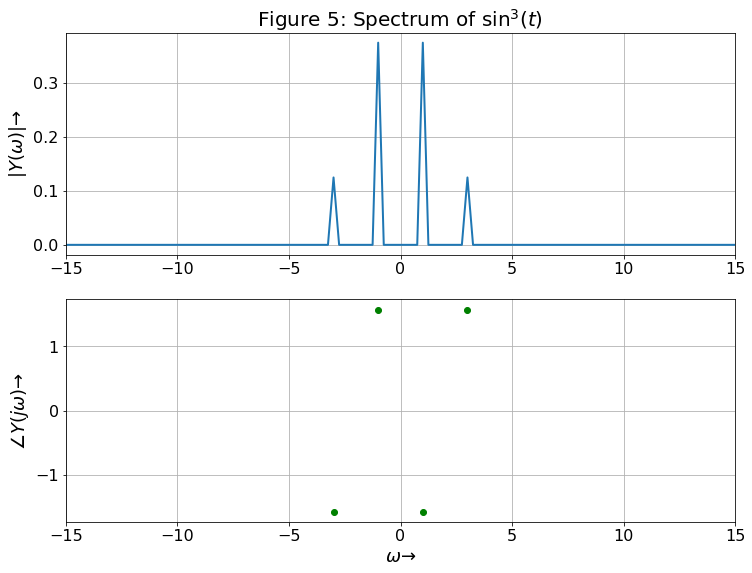

In [13]:
%%writefile_run ee16b031_assignment9.py -a

t,Y,w = findFFT(-4*pi,4*pi,512,f,3)
Xlims = [-15,15]
Ylims = [-2*pi,2*pi]
tti= r"Figure 5: Spectrum of $\sin ^{3}(t)$"
plot_FFT(t,Y,w,1e-4,Xlims,tti,"5")

### Results and Discussion :
* As we observe the plot frequency contents are of $\omega = 1,-1,3,-3$ and with their amplitude in 1:3 ratio
* Since everything consists of $\sin $ terms so phase is zero and $\pi$ alternatively. 

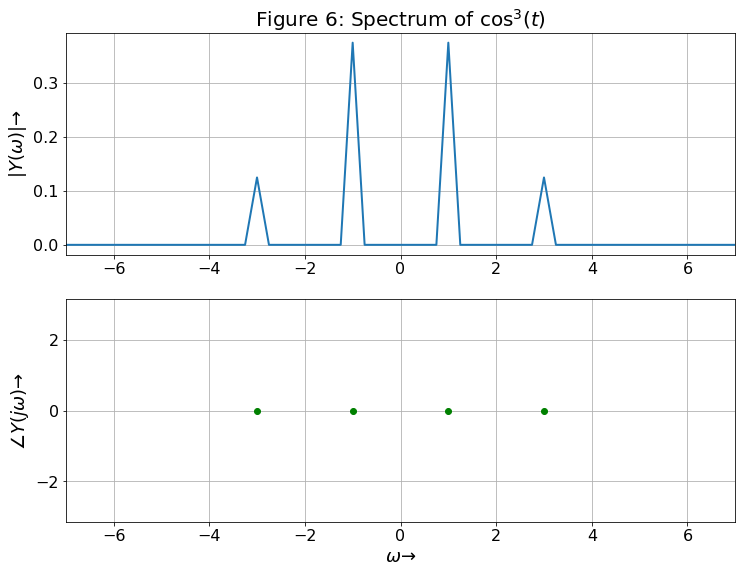

In [14]:
%%writefile_run ee16b031_assignment9.py -a


t,Y,w = findFFT(-4*pi,4*pi,512,f,4)
Xlims = [-7,7]
Ylims = [-pi,pi]
plot_FFT(t,Y,w,1e-4,Xlims,r"Figure 6: Spectrum of $\cos^{3}(t)$","6",Ylims)

### Results and Discussion :
* As we observe the plot frequency contents are of $\omega = 1,-1,3,-3$ and with their amplitude in 1:3 ratio
* Since everything consists of $\cos $ terms so phase is zero. But due to lack of infinite computing power they are nearly zero in the order of $10^{-15}$

# Question 3:

* To generate the spectrum of $\cos(20t +5\cos(t))$. 
* Plot phase points only where the magnitude is significant ($\ > 10^{-3}$).
* Analyse the spectrums obtained.

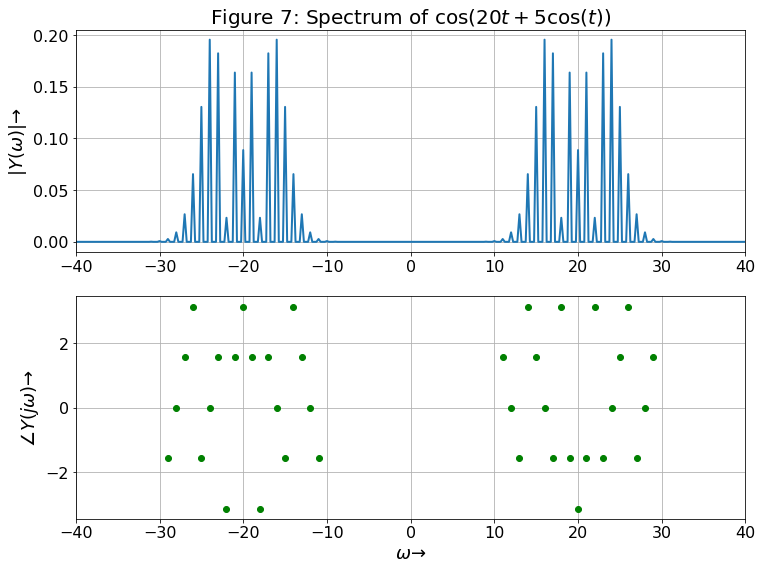

In [15]:
%%writefile_run ee16b031_assignment9.py -a

t,Y,w = findFFT(-4*pi,4*pi,512,f,5)
Xlims = [-40,40]
plot_FFT(t,Y,w,1e-3,Xlims,r"Figure 7: Spectrum of $\cos(20t+5\cos(t))$","7")

### Results and Discussion :
* As we observe the plot that its a Phase modulation since phase of the signal is varying proportional to amplitude of the message signal being $\omega = 20$ and infinite side band frequencies which are produced by $5\cos t$. since $\cos(t)$ is infinitely long signal. But the strength of the side band frequencies decays or very small which are away from center frequency or carrier frequency component as we observe from the plot.
* Phase spectra is a mix of different phases from $[-\pi,\pi]$ because of phase modulation, i.e since the phase is changed continuously wrt time, the carrier signal can represent either a $sine$ or $cosine$ depending on the phase contribution from $cos(t)$.

# Question 4:

* To generate the spectrum of the Gaussian $e^{-\frac{t^{2}}{ 2}}$ which is not $bandlimited$ in frequency and aperiodic in time domain find Fourier transform of it using DFT and to recover the analog fourier transform from it.

\begin{equation}
 \mathscr{F} ( \ e^{-\frac{t^{2}}{2}} \ ) \to \frac{1}{\sqrt 2\pi} e^{\frac{\ - \omega ^{2}}{2}}
\end{equation}

* To find the normalising constant for DFT obtained we use following steps to derive it :
  * window the signal $e^{-\frac{t^{2}}{2}}$ by rectangular function with gain 1 and window_size 'T' which is equivalent to convolving with $Tsinc(\omega T)$ in frequency domain. So As T is very large the $sinc(\omega T) $ shrinks , we can approximate that as $\delta(\omega)$ . So convolving with that we get same thing.
  * Windowing done because finite computing power and so we cant represent infinetly wide signal .
  * Now we sample the signal with sampling rate N,which is equivalent to convolving impulse train in frequency domain
  * And finally for DFT we create periodic copies of the windowed sampled signal and make it periodic and then take one period of its Fourier transform i.e is DFT of gaussian.
  * Following these steps we get normalising factor of **Window_size/($2 \pi \ $Sampling_rate)**
  

\begin{equation}
exp({-\frac{t^2}{2}}) \longleftrightarrow \frac{1}{\sqrt{2\pi}}exp({-\frac{\omega^2}{2}})
\end{equation}

\begin{equation}
rect(\frac{t}{\tau}) =
\begin{cases}
1\  for\ |t| < \tau \\
0\ otherwise
\end{cases}
\end{equation}


* For windowing the signal, we will multiply with the rectangular function,

\begin{equation}
y(t) = gaussian(t) \times rect(\frac{t}{\tau})
\end{equation}

* In fourier domain, its convolution (since multiplication is convolution in fourier domain)


\begin{equation}
Y(\omega) = \frac{1}{2\pi}(\frac{1}{\sqrt{(2\pi)}}e^{-\omega^2/2} * \frac{sin(\tau \omega)}{\omega})
\end{equation}

\begin{equation}
\lim_{\tau \to\infty} Y(\omega) = \frac{\tau}{2\pi}(\frac{1}{\sqrt{(2\pi)}}e^{-\omega^2/2} * \delta(\omega))
\end{equation}

\begin{equation}
\lim_{\tau \to\infty} Y(\omega) = \frac{\tau}{2\pi}(\frac{1}{\sqrt{(2\pi)}}e^{-\omega^2/2})
\end{equation}

* Now, sampling this signal with a period of $\frac{2\pi}{T_s}$, we will get (multiplication by an impulse train in fourier domain),

\begin{equation}
Y_{sampled} = \frac{\tau}{2\pi T_s}\frac{1}{\sqrt{(2\pi)}}e^{-\omega^2/2} \sum_{k = -\infty}^{\infty}\delta(\omega - \frac{k2\pi}{T_s})
\end{equation}

* Solving it further we get the multiplication factor to be,


\begin{equation}
const = \frac{\tau}{T_s 2\pi}
\end{equation}

* To find the Discrete Fourier transform equivalent for Continous Fourier transform of Gaussian function by finding absolute error between the DFT obtained using the normalising factor obtained with exact Fourier transform and find the parameters such as Window_size and sampling rate by minimising the error obtained with tolerance of $10^{-15}$
* To generate the spectrum
* Plot phase points only where the magnitude is significant ($\ > 10^{-2}$).
* Analyse the spectrums obtained.

Absolute error at Iteration - 1 is : 5.20042e-05
Absolute error at Iteration - 2 is : 2.07579e-11
Absolute error at Iteration - 3 is : 4.14035e-17

Accuracy of the DFT is: 4.14035e-17 and Iterations took: 3
Best Window_size: 25.1327 , Sampling_rate: 512


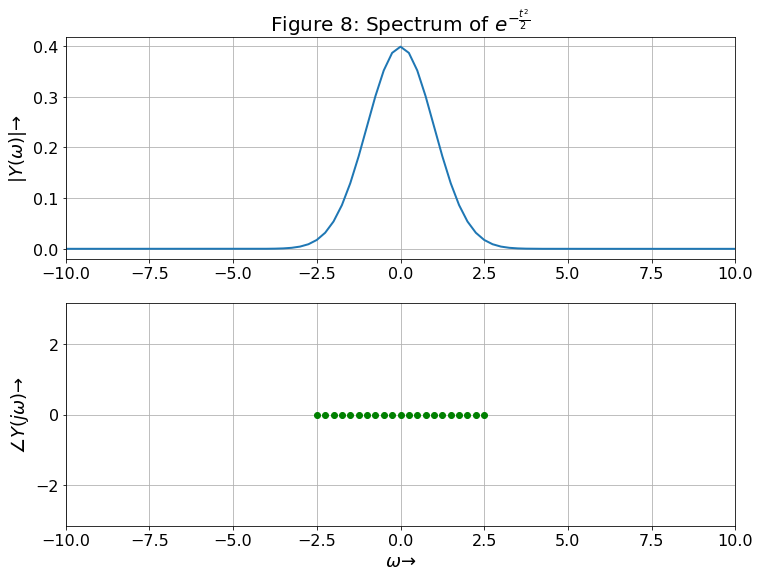

ValueError: 
\frac{1}{\sqrt 2\pi} e^{\frac{\ - \omega ^{2}}{2}}
               ^
Expected \sqrt{value} (at char 15), (line:1, col:16)

ValueError: 
\frac{1}{\sqrt 2\pi} e^{\frac{\ - \omega ^{2}}{2}}
               ^
Expected \sqrt{value} (at char 15), (line:1, col:16)

In [16]:
%%writefile_run ee16b031_assignment9.py -a

# initial window_size and sampling rate defined
window_size = 2*pi
sampling_rate = 128
# tolerance for error
tol = 1e-15

#normalisation factor derived
norm_factor = (window_size)/(2*pi*(sampling_rate))

'''
For loop to minimize the error by increasing 
both window_size and sampling rate as we made assumption that
when Window_size is large the sinc(w) acts like impulse, so we
increase window_size, similarly sampling rate increased to 
overcome aliasing problems
'''

for i in range(1,10):
   
    t,Y,w = findFFT(-window_size/2,window_size/2,
                    sampling_rate,f,6,norm_factor)
        
    #actual Y
    actual_Y = (1/sqrt(2*pi))*exp(-pow(w,2)/2)
    error = (np.mean(np.abs(np.abs(Y)-actual_Y)))
    print("Absolute error at Iteration - %g is : %g"%((i,error)))
    
    if(error < tol):
        print("\nAccuracy of the DFT is: %g and Iterations took: %g"
              %((error,i)))
        print("Best Window_size: %g , Sampling_rate: %g"%
              ((window_size,sampling_rate)))
        break
    else:
        window_size   = window_size*2
        sampling_rate = (sampling_rate)*2
        norm_factor = (window_size)/(2*pi*(sampling_rate))
    

Xlims = [-10,10]
Ylims = [-pi,pi]

plot_FFT(t,Y,w,1e-2,Xlims,
         r"Figure 8: Spectrum of $e^{-\frac{t^{2}}{ 2}}$","8",
         Ylims)

#Plotting actual DFT of Gaussian
subplot(2,1,2)
plot(w,abs(actual_Y),
     label=r"$\frac{1}{\sqrt 2\pi} e^{\frac{\ - \omega ^{2}}{2}}$")
title("Exact Fourier Transform of Gaussian")
xlim([-10,10])
ylabel(r"$Y(\omega) \to$")
xlabel(r"$\omega \to$")
grid()
legend()
show()

### Results and Discussion :
* As we observe the magnitude spectrum of $e^{-\frac{t^{2}}{ 2}}$ we see that it almost coincides with  exact Fourier Transform plotted below with accuracy of $4.14035e^{-17}$
* To find the correct Window size and sampling rate,For loop is used to minimize the error by increasing both window_size and sampling rate as we made assumption that when Window_size is large the sinc(wT) acts like impulse $\delta(\omega)$
* so we increase window_size, similarly sampling rate is increased to overcome aliasing problems when sampling the signal in time domain.
* Similarly we observe the phase plot ,$\angle(Y(\omega) \approx 0$ in the order of $10^{-15}$ if we magnify and observe

## Conclusion :
* Hence we analysed the how to find DFT for various types of signals and how to estimate normalising factors for Gaussian functions and hence recover the analog Fourier transform using DFT ,also to find parameters like window_size and sampling rate by minimizing the error with tolerance upto $10^{-15}!!$
* We used fast Fourier transform method to compute DFT as it improves the computation time from $\mathcal{O} n^2 \to \mathcal{O} n\log_2(n)$.
* FFT works well for signals with samples in $2^{k}$ , as it divides the samples into even and odd and goes dividing further to compute the DFT.
* That's why we use no of samples in the problems above taken as powers of $2$.